<a href="https://colab.research.google.com/github/osebasp/ML-Applications-for-Actuarial-Science/blob/main/Estimaci%C3%B3n_reservas_de_siniestros_V01_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscar Pulido
# Implementación modelo de Machine Learning para la estimación de la reserva de siniestros de un conjunto de datos de compañías aseguradoras V2.0 Parte 1


En este documento se presentará el avance del proyecto siguiendo la metodología CRISP-DM. Esto se complementa con una serie de documentos disponibles para la revisión en el entorno de GitHub.

El objetivo de este cuaderno es mostrar el desarrollo de la metodología de CRISP-DM para la ejecución del proyecto.

Por temas de manejo de recursos, las fases de análisis de entendimiento de la información y exploración de los datos, se llevaran a cabo en este notebook. Posteriormente se tendrá un notebook con lenguaje Python para la fase de modelación y posteriores: https://github.com/osebasp/ML-Applications-for-Actuarial-Science

#1. Fase de entendimiento del negocio

Esta fase se encuentra ejecutada con mayor detalle en el siguiente enlace:

https://github.com/osebasp/ML-Applications-for-Actuarial-Science bajo el nombre: ***Metodología CRISP DM para problema de estimación de reservas Oscar Pulido***

Se hace la consideración porque esta fase del proyecto no tiene tanto contenido programable como para ser introducido en un notebook.





#2. Fase de entendimiento de los datos

A continuación, se muestra la fase de entendimiento de los datos. Esto se ve complementado por el documento complementario y se encuentra ejecutada con mayor detalle en el siguiente enlace:

https://github.com/osebasp/ML-Applications-for-Actuarial-Science bajo el nombre: ***Metodología CRISP DM para problema de estimación de reservas Oscar Pulido***

El objetivo de esta fase es hacer un análisis exploratorio de los datos.

En primer lugar, se muestran las librerías usadas para el trabajo.
En resumen, las librerías a usar ayudan al procesamiento de datos y exploración de la información. Esto es así porque los datos están agregados, para hallar la reserva IBNR de cada una de las compañías. Como se verá hay problemas leves con la calidad de la información, como pagos en 0 o pagos atípicos que distorsionarían la calidad de la estimación por los distintos métodos usados. Este procedimiento es ampliamente usado por muchas aseguradoras.

In [ ]:
library(tibble)
library(readr)
library(dplyr)
library(knitr)
library(tidyr)
install.packages("kableExtra")
library(kableExtra)
library(ggplot2)
install.packages("ggplot2")
library(ggplot2)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Para el ejercicio se considerará un conjunto de datos con pagos de siniestros del ramo de salud para distintas compañías. Lo interesante de este ejercicio es que, dada la naturaleza de la información, es posible suponer que los pagos a partir de 1997 son desconocidos, lo cual permite validar la precisión de las predicciones.

A continuación se muestra la forma de importación de los datos para la base medmal_pos.csv:

Nota: Dado que se está en un entorno de ejecución de R, no es posible alojar el conjunto de datos en el drive de la sesión. Por lo tanto, se importará la información de la siguiente forma y a partir de la siguiente fuente: https://www.casact.org/sites/default/files/2021-04/medmal_pos.csv

In [ ]:
url <- "https://www.casact.org/sites/default/files/2021-04/medmal_pos.csv"
MedMal<-read_csv(url)

Rows: 3400 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): GRNAME
dbl (12): GRCODE, AccidentYear, DevelopmentYear, DevelopmentLag, IncurLoss_F...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Un análisis preliminar de los datos muestra lo siguiente:

In [ ]:
str(MedMal)

spc_tbl_ [3,400 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ GRCODE            : num [1:3400] 669 669 669 669 669 669 669 669 669 669 ...
 $ GRNAME            : chr [1:3400] "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" ...
 $ AccidentYear      : num [1:3400] 1988 1988 1988 1988 1988 ...
 $ DevelopmentYear   : num [1:3400] 1988 1989 1990 1991 1992 ...
 $ DevelopmentLag    : num [1:3400] 1 2 3 4 5 6 7 8 9 10 ...
 $ IncurLoss_F2      : num [1:3400] 121905 112211 103226 99599 96006 ...
 $ CumPaidLoss_F2    : num [1:3400] 2716 24576 43990 59722 71019 ...
 $ BulkLoss_F2       : num [1:3400] 97966 64117 39008 20736 13599 ...
 $ EarnedPremDIR_F2  : num [1:3400] 129104 129104 129104 129104 129104 ...
 $ EarnedPremCeded_F2: num [1:3400] -6214 -6214 -6214 -6214 -6214 ...
 $ EarnedPremNet_F2  : num [1:3400] 135318 135318 135318 135318 135318 ...
 $ Single            : num [1:3400] 0 0 0 0 0 0 0 0 0 0 ...
 $ PostedReserve97_F2: num [1:3400] 344558 344558 3

Los formatos lucen de la siguiente manera:

In [ ]:
formatos <- MedMal %>%
  summarize_all(list(format = ~ toString(class(.))))
View(formatos)

GRCODE_format,GRNAME_format,AccidentYear_format,DevelopmentYear_format,DevelopmentLag_format,IncurLoss_F2_format,CumPaidLoss_F2_format,BulkLoss_F2_format,EarnedPremDIR_F2_format,EarnedPremCeded_F2_format,EarnedPremNet_F2_format,Single_format,PostedReserve97_F2_format
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
numeric,character,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


La única variable categórica es GRCODE que se compone de la siguiente manera:

In [ ]:
elementos <- unique(MedMal$GRNAME)
elementos_distintos_df <- data.frame(Compañía = elementos)
View(elementos_distintos_df)

Compañía
<chr>
Scpie Indemnity Co
Promutual Grp
Great Amer Grp
Nationwide Grp
Markel Corp Grp
Overseas Partners Us Reins Co
Eastern Dentists Ins Co RRG
American Assoc Of Othodontists RRG
Controlled Risk Ins Co Of VT Inc


Las estadisticas descriptivas se ven así:

In [ ]:
EstDesc<-summary(MedMal)
EstDesc

     GRCODE         GRNAME           AccidentYear  DevelopmentYear
 Min.   :  669   Length:3400        Min.   :1988   Min.   :1988   
 1st Qu.:10341   Class :character   1st Qu.:1990   1st Qu.:1994   
 Median :19764   Mode  :character   Median :1992   Median :1997   
 Mean   :22810                      Mean   :1992   Mean   :1997   
 3rd Qu.:36234                      3rd Qu.:1995   3rd Qu.:2000   
 Max.   :44504                      Max.   :1997   Max.   :2006   
 DevelopmentLag  IncurLoss_F2    CumPaidLoss_F2    BulkLoss_F2      
 Min.   : 1.0   Min.   :   -17   Min.   : -1190   Min.   :-32101.0  
 1st Qu.: 3.0   1st Qu.:     0   1st Qu.:     0   1st Qu.:     0.0  
 Median : 5.5   Median :   645   Median :   187   Median :     0.0  
 Mean   : 5.5   Mean   : 11609   Mean   :  6706   Mean   :  1095.8  
 3rd Qu.: 8.0   3rd Qu.:  9050   3rd Qu.:  4386   3rd Qu.:   107.2  
 Max.   :10.0   Max.   :179425   Max.   :113189   Max.   :104402.0  
 EarnedPremDIR_F2 EarnedPremCeded_F2 EarnedPremN

A continuación, se presenta un análisis exploratorio de las cifras relacionadas a los siniestros que representan un insumo importante dentro del IBNR con base en el año de desarrollo:

In [ ]:
resumen_por_año <- MedMal %>%
  group_by(DevelopmentYear) %>%
  summarise(Incurred_Loss = sum(IncurLoss_F2), Cummulate_Paid_Loss = sum(CumPaidLoss_F2))

resumen_por_año<-as.data.frame(resumen_por_año)
View(resumen_por_año)


DevelopmentYear,Incurred_Loss,Cummulate_Paid_Loss
<dbl>,<dbl>,<dbl>
1988,380154,5934
1989,708400,56691
1990,1109363,158905
1991,1536151,294851
1992,1976508,519149
1993,2339316,764008
1994,2713949,1048700
1995,3142552,1364851
1996,3585381,1705949


Se tienen las gráficas para el análisis exploratorio de la información:

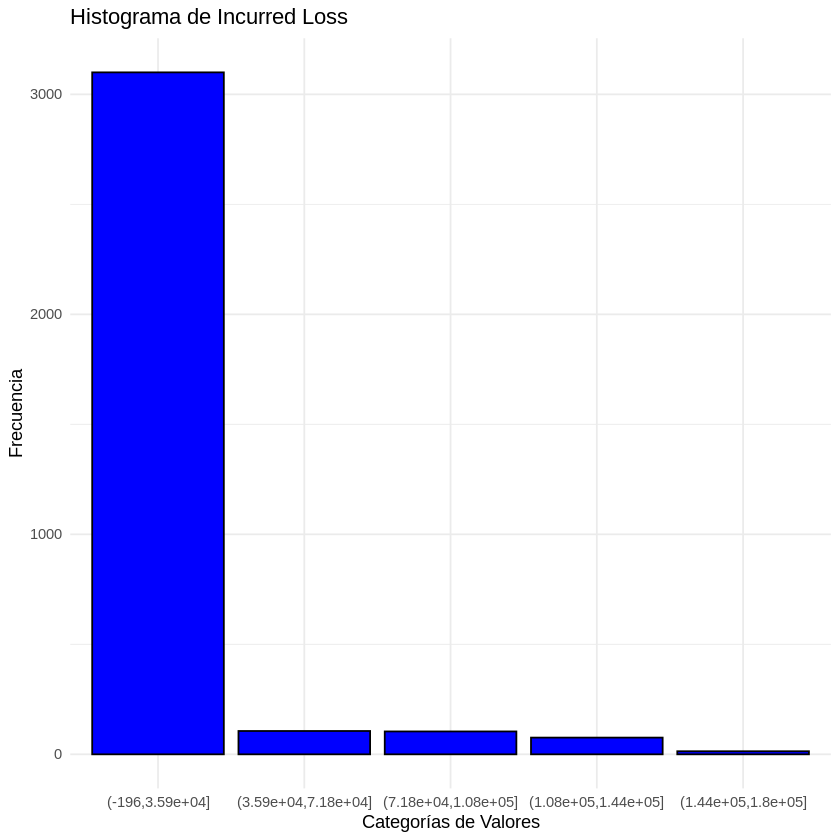

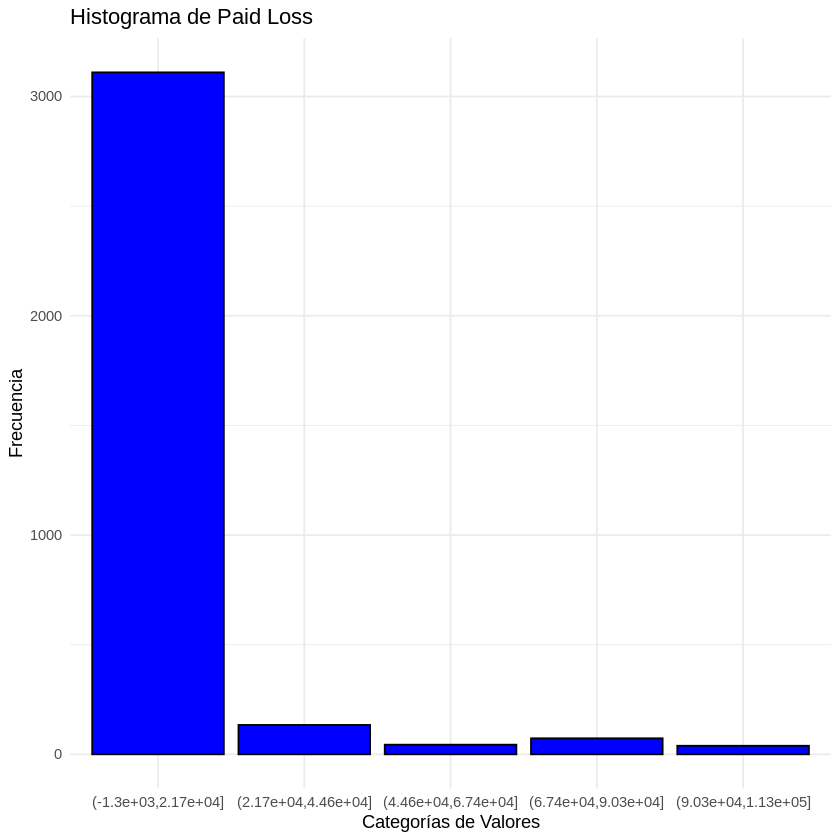

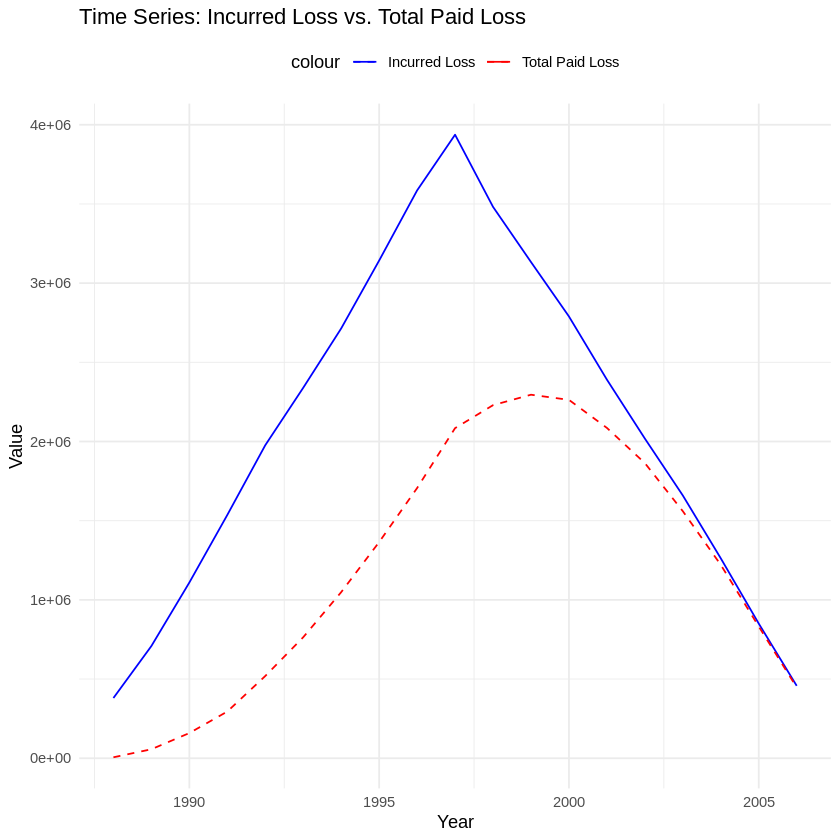

In [ ]:
intervalos <- cut(MedMal$IncurLoss_F2, breaks = 5)

# Crear un histograma con ggplot2
ggplot(data = MedMal, aes(x = intervalos)) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Histograma de Incurred Loss",
       x = "Categorías de Valores",
       y = "Frecuencia") +
  theme_minimal()

intervalos2 <- cut(MedMal$CumPaidLoss_F2, breaks = 5)

# Crear un histograma con ggplot2
ggplot(data = MedMal, aes(x = intervalos2)) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Histograma de Paid Loss",
       x = "Categorías de Valores",
       y = "Frecuencia") +
  theme_minimal()


ggplot(data = resumen_por_año, aes(x = DevelopmentYear)) +
  geom_line(aes(y = Incurred_Loss, color = "Incurred Loss"), linetype = "solid") +
  geom_line(aes(y = Cummulate_Paid_Loss, color = "Total Paid Loss"), linetype = "dashed") +
  labs(title = "Time Series: Incurred Loss vs. Total Paid Loss",
       x = "Year",
       y = "Value") +
  scale_color_manual(values = c("Incurred Loss" = "blue", "Total Paid Loss" = "red")) +
  scale_linetype_manual(values = c("Incurred Loss" = "solid", "Total Paid Loss" = "dashed")) +
  theme_minimal() +
  theme(legend.position = "top")

A continuación se muestra la tendencia de desarrollo con base en los siniestros ocurridos

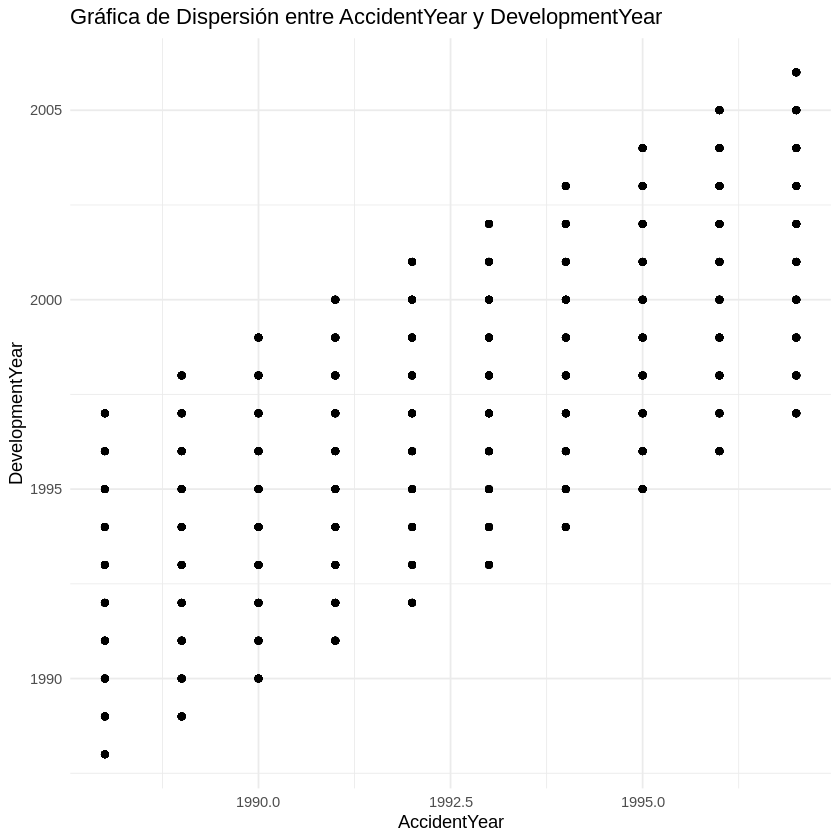

In [ ]:
ggplot(data = MedMal, aes(x = AccidentYear, y = DevelopmentYear)) +
  geom_point() +
  labs(title = "Gráfica de Dispersión entre AccidentYear y DevelopmentYear",
       x = "AccidentYear",
       y = "DevelopmentYear") +
  theme_minimal()

Para el reporte de calidad se realiza un análisis de valores nulos

In [ ]:
Nulos<-is.na(MedMal)

cantidad_nulos_por_columna <- colSums(Nulos)

tabla_nulos <- data.frame(Variable = names(cantidad_nulos_por_columna),
                          ValoresNulos = cantidad_nulos_por_columna)
print(tabla_nulos)

                             Variable ValoresNulos
GRCODE                         GRCODE            0
GRNAME                         GRNAME            0
AccidentYear             AccidentYear            0
DevelopmentYear       DevelopmentYear            0
DevelopmentLag         DevelopmentLag            0
IncurLoss_F2             IncurLoss_F2            0
CumPaidLoss_F2         CumPaidLoss_F2            0
BulkLoss_F2               BulkLoss_F2            0
EarnedPremDIR_F2     EarnedPremDIR_F2            0
EarnedPremCeded_F2 EarnedPremCeded_F2            0
EarnedPremNet_F2     EarnedPremNet_F2            0
Single                         Single            0
PostedReserve97_F2 PostedReserve97_F2            0


Un analisis de boxplot nos puede ayudar a identificar outliers en los datos:

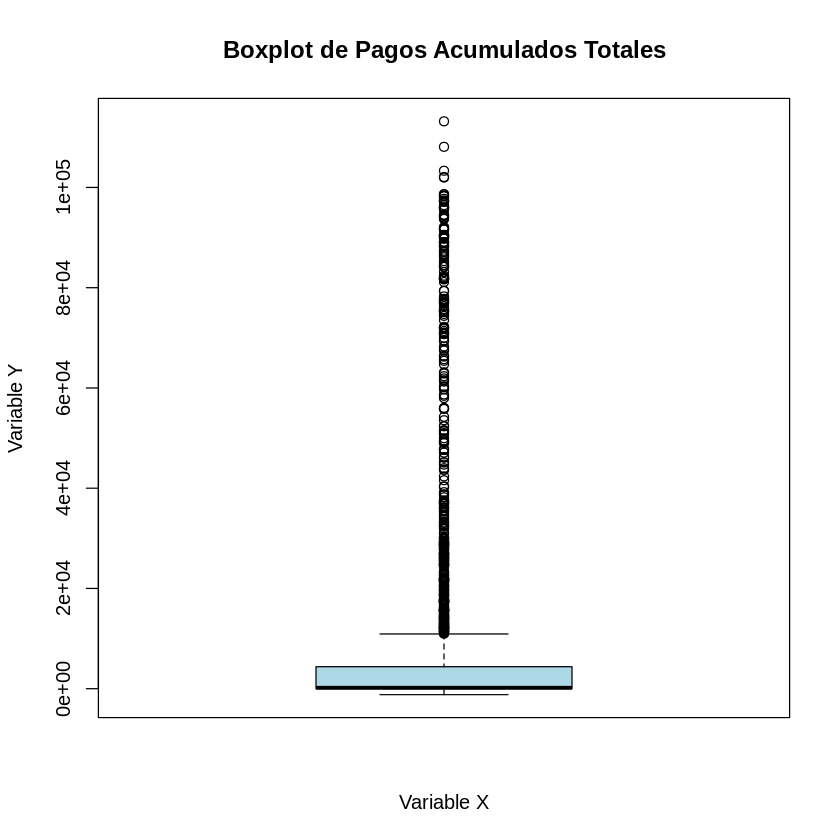

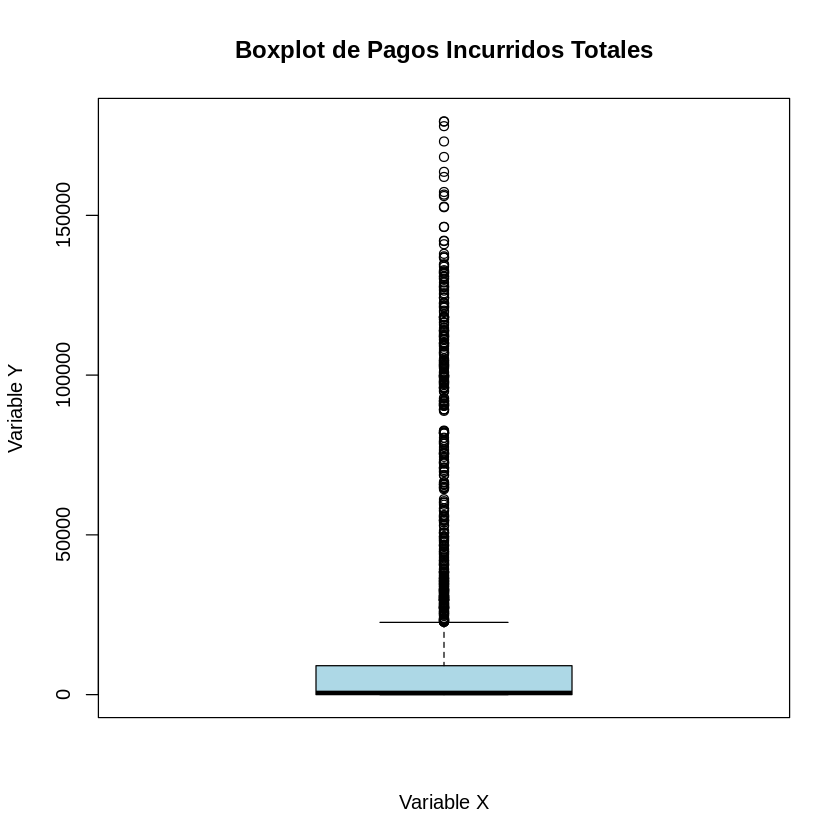

In [ ]:
boxplot(MedMal$CumPaidLoss_F2,
        main = "Boxplot de Pagos Acumulados Totales",
        xlab = "Variable X",
        ylab = "Variable Y",
        col = "lightblue",
        border = "black",
        notch = FALSE,
        horizontal = FALSE
)

boxplot(MedMal$IncurLoss_F2,
        main = "Boxplot de Pagos Incurridos Totales",
        xlab = "Variable X",
        ylab = "Variable Y",
        col = "lightblue",
        border = "black",
        notch = FALSE,
        horizontal = FALSE
)

# 3. Fase de preparación de la información

Dentro de esta fase se mostrarán los filtros y transformaciones necesarias para trabajar con la información. Con base en los análisis anteriores, se presentará el procedimiento para excluir cierta información que puede causar una perturbación en las estimaciones de la reserva IBNR.

Primero se muestra la fase de selección de ítems. Acá se busca justificar porque se seleccionan o se descartan algunas filas dentro de la información. Debido al supuesto de existencia de informacion hasta 1997, se descartan estas filas para las variables de año de accidente y año de desarrollo.

In [ ]:
MedMalItems<- MedMal %>%
                      filter(DevelopmentYear<=1997)
str(MedMalItems)

spc_tbl_ [1,870 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ GRCODE            : num [1:1870] 669 669 669 669 669 669 669 669 669 669 ...
 $ GRNAME            : chr [1:1870] "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" ...
 $ AccidentYear      : num [1:1870] 1988 1988 1988 1988 1988 ...
 $ DevelopmentYear   : num [1:1870] 1988 1989 1990 1991 1992 ...
 $ DevelopmentLag    : num [1:1870] 1 2 3 4 5 6 7 8 9 10 ...
 $ IncurLoss_F2      : num [1:1870] 121905 112211 103226 99599 96006 ...
 $ CumPaidLoss_F2    : num [1:1870] 2716 24576 43990 59722 71019 ...
 $ BulkLoss_F2       : num [1:1870] 97966 64117 39008 20736 13599 ...
 $ EarnedPremDIR_F2  : num [1:1870] 129104 129104 129104 129104 129104 ...
 $ EarnedPremCeded_F2: num [1:1870] -6214 -6214 -6214 -6214 -6214 ...
 $ EarnedPremNet_F2  : num [1:1870] 135318 135318 135318 135318 135318 ...
 $ Single            : num [1:1870] 0 0 0 0 0 0 0 0 0 0 ...
 $ PostedReserve97_F2: num [1:1870] 344558 344558 3

Es necesario hacer un filtro adicionale para los valores negativos

In [ ]:
MedMalItems<-MedMalItems %>% filter(CumPaidLoss_F2>0)


A continuación, se muestra una tabla de los promedios por compañía

In [ ]:
Promedios <- MedMalItems %>%
  group_by(GRNAME) %>%
  summarize(Promedio_CumPaidLoss_F2 = mean(CumPaidLoss_F2, na.rm = TRUE))
Promedios


GRNAME,Promedio_CumPaidLoss_F2
<chr>,<dbl>
American Assoc Of Othodontists RRG,45.20000
California Healthcare Ins Co Inc,537.93023
Campmed Cas & Ind Co Inc MD,15.42857
Clinic Mut Ins Co RRG,984.58182
Community Blood Cntr Exch RRG,49.00000
Controlled Risk Ins Co Of VT Inc,1016.66667
Dentists Ins Co,5681.92727
Eastern Dentists Ins Co RRG,18.50000
Great Amer Grp,348.44444


La tecnica de imputación usada contempla el método de z-score. Acá se establece un criterio de atípicos y se reemplaza por la media aquellos que salen de un umbral definido

In [ ]:
MedMalItems3 <- MedMalItems %>% #Join para unir tablas de promedios y la principal
  left_join(Promedios, by = c("GRNAME"="GRNAME"))


MedMalItems4<-MedMalItems3 %>%
  mutate(z_score = (CumPaidLoss_F2 - Promedio_CumPaidLoss_F2) / sd(CumPaidLoss_F2, na.rm = TRUE))

MedMalItems5<- MedMalItems4 %>%
  mutate(umbral_z = 0.05) #Ajustar de acuerdo a resultados

# Reemplazar valores atípicos
MedMalItems6 <- MedMalItems5 %>%
  mutate(CumPaidLoss_F2 = ifelse(abs(z_score) > umbral_z, Promedio_CumPaidLoss_F2, CumPaidLoss_F2))
MedMalItems6

GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2,Promedio_CumPaidLoss_F2,z_score,umbral_z
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
669,Scpie Indemnity Co,1988,1988,1,121905,55091.33,97966,129104,-6214,135318,0,344558,55091.33,-3.1757384,0.05
669,Scpie Indemnity Co,1988,1989,2,112211,55091.33,64117,129104,-6214,135318,0,344558,55091.33,-1.8502738,0.05
669,Scpie Indemnity Co,1988,1990,3,103226,55091.33,39008,129104,-6214,135318,0,344558,55091.33,-0.6731206,0.05
669,Scpie Indemnity Co,1988,1991,4,99599,55091.33,20736,129104,-6214,135318,0,344558,55091.33,0.2807773,0.05
669,Scpie Indemnity Co,1988,1992,5,96006,55091.33,13599,129104,-6214,135318,0,344558,55091.33,0.9657624,0.05
669,Scpie Indemnity Co,1988,1993,6,90487,55091.33,10577,129104,-6214,135318,0,344558,55091.33,1.2892461,0.05
669,Scpie Indemnity Co,1988,1994,7,82640,55091.33,3762,129104,-6214,135318,0,344558,55091.33,1.3158039,0.05
669,Scpie Indemnity Co,1988,1995,8,80406,55091.33,2105,129104,-6214,135318,0,344558,55091.33,1.3409671,0.05
669,Scpie Indemnity Co,1988,1996,9,78920,55091.33,819,129104,-6214,135318,0,344558,55091.33,1.3640688,0.05


La estructura final de la base de datos es la siguiente

In [ ]:
MedMalFinal <- MedMalItems6 %>%
                    select(GRCODE, GRNAME, AccidentYear, DevelopmentYear,CumPaidLoss_F2, IncurLoss_F2, DevelopmentLag)

View(MedMalFinal)

GRCODE,GRNAME,AccidentYear,DevelopmentYear,CumPaidLoss_F2,IncurLoss_F2,DevelopmentLag
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
669,Scpie Indemnity Co,1988,1988,55091.33,121905,1
669,Scpie Indemnity Co,1988,1989,55091.33,112211,2
669,Scpie Indemnity Co,1988,1990,55091.33,103226,3
669,Scpie Indemnity Co,1988,1991,55091.33,99599,4
669,Scpie Indemnity Co,1988,1992,55091.33,96006,5
669,Scpie Indemnity Co,1988,1993,55091.33,90487,6
669,Scpie Indemnity Co,1988,1994,55091.33,82640,7
669,Scpie Indemnity Co,1988,1995,55091.33,80406,8
669,Scpie Indemnity Co,1988,1996,55091.33,78920,9


# 4. Fase de modelación

Como se ha comentado al inicio de este notebook y en la documentación adjunta, la idea de este trabajo es lograr mejores estimaciones que las logradas por el método Chain Ladder, inicialmente se contemplan dos técnicas de modelación, la clásica con Chain Ladder y la de mayor interés que es con un método basado en la lectura encontrada en el siguiente enlace y que se guía por regresión lineal:

https://www.casact.org/sites/default/files/2021-02/pubs_forum_94spforum_94spf393.pdf

La implementación de las dos metodologías se llevarán a cabo en un notebook configurado para ejecutar codigos de Python y se encuentra en el siguiente enlace: https://github.com/osebasp/ML-Applications-for-Actuarial-Science y es la segunda parte de este trabajo. Adicionalmente, se explorarán las Regresiones de Ridge y Lasso.

Los motivos detrás de esta decisión son que Python cuenta con mayores recursos para llevar a cabo la modelación, asimismo tiene mayores condiciones para implementar aplicaciones de Machine Learning.